### Lab2

#### Task1

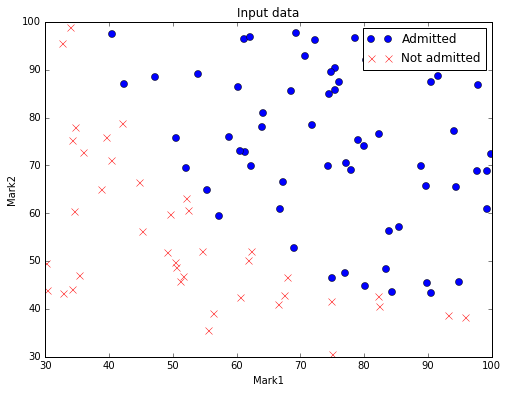

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
csv = np.genfromtxt('ex2/ex2data1.txt', delimiter=",")
# Marks
x = csv[:,:2]
# Result
y = csv[:,2]
y = y.astype(np.int)
#print(x)
#print(y)
x1 = x[y==1]
x2 = x[y==0]
def plotInputData():
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x1[:, 0], x1[:, 1],'o',ms=7, label='Admitted')
    plt.plot(x2[:, 0], x2[:, 1],'rx',ms=7, label='Not admitted')
    plt.title('Input data')
    plt.ylabel('Mark2')
    plt.xlabel('Mark1')
plotInputData()
plt.legend()

[[ 0.09432673  0.08817996]]
[-11.12335114]
0.91


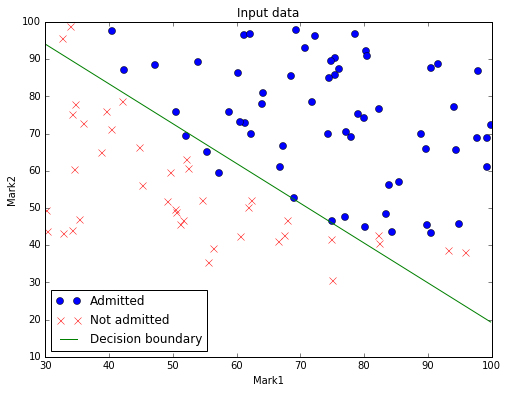

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 10, penalty='l2')
model.fit(x,y)
print(model.coef_)
print(model.intercept_)
theta = model.coef_.squeeze()
theta0 = model.intercept_
plot_x1 = np.array([ x[:,0].min(), x[:,0].max() ])
plot_x2 = (-1.0 / theta[1]) * (plot_x1 * theta[0] + theta0) 
plotInputData()
plt.plot(plot_x1, plot_x2, label='Decision boundary')
plt.legend(loc='lower left')
print(model.score(x, y))

#### Task2

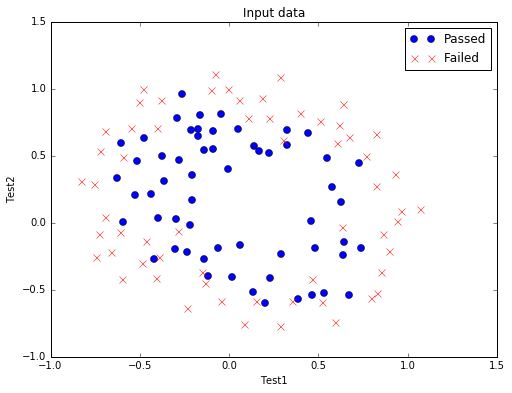

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
csv = np.genfromtxt('ex2/ex2data2.txt', delimiter=",")
# Marks
x = csv[:,:2]
# Result
y = csv[:,2]
y = y.astype(np.int)
#print(x)
#print(y)
x1 = x[y==1]
x2 = x[y==0]
def plotInputData():
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x1[:, 0], x1[:, 1],'o',ms=7, label='Passed')
    plt.plot(x2[:, 0], x2[:, 1],'rx',ms=7, label='Failed')
    plt.title('Input data')
    plt.ylabel('Test2')
    plt.xlabel('Test1')
plotInputData()
plt.legend()

In [12]:
def mapFeature(x1, x2, degree):
    out = x1[:, np.newaxis]
    out = np.append(out, x2[:, np.newaxis], axis = 1)
    
    for i in range(2,degree+1):
        for j in range(0,i+1):
            a = x1**(i-j) * x2**j
            out = np.append(out, a[:, np.newaxis], axis = 1)
            #print(i-j,j)
    #print(out)
    return out
mapFeature(np.array([1, 2, 3]), np.array([4, 5, 6]), )

array([[    1,     4,     1,     4,    16,     1,     4,    16,    64,
            1,     4,    16,    64,   256,     1,     4,    16,    64,
          256,  1024,     1,     4,    16,    64,   256,  1024,  4096],
       [    2,     5,     4,    10,    25,     8,    20,    50,   125,
           16,    40,   100,   250,   625,    32,    80,   200,   500,
         1250,  3125,    64,   160,   400,  1000,  2500,  6250, 15625],
       [    3,     6,     9,    18,    36,    27,    54,   108,   216,
           81,   162,   324,   648,  1296,   243,   486,   972,  1944,
         3888,  7776,   729,  1458,  2916,  5832, 11664, 23328, 46656]])

In [5]:
model = LogisticRegression(C = 10, penalty='l2')
model.fit(x,y)
print(model.coef_)
print(model.intercept_)
print(model.score(x, y))

x2 = mapFeature(x[:,0], x[:,1], 5)
model.fit(x2,y)
print(model.coef_)
print(model.intercept_)
print(model.score(x2, y))

[[-0.29922852 -0.01737759]]
[-0.01450109]
0.550847457627
[[ 1.83851172  2.99209477 -4.51387562 -3.3388622  -4.21005018  0.56560346
  -1.0988128  -0.52343648 -0.64639466 -4.05796775  0.74540906 -1.79491878
  -1.25920042 -3.200688   -0.99400239 -0.46743939  0.63979138 -1.13648455
  -1.28601404 -0.44445287]]
[ 2.74797852]
0.847457627119


In [7]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((u.shape[0], v.shape[0]))
c=True
for i in enumerate(u):
    for j in enumerate(v):
        a = mapFeature(u[i, np.newaxis], v[j, np.newaxis], 2)
        #print(a[:,:,].shape, model.coef_.shape)
        if(c):
            print(a)
            c = False
        
        #z[i,j] = a.dot(model.coef_)

[[[-1.  ]
  [-1.  ]
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 1.5 ]
  [ 1.5 ]
  [ 2.25]
  [ 2.25]
  [ 2.25]]]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


In [ ]:
h